DIY Covid-19 Dashboard - London and North West regions

- Data from Public Health England (PHE) on Covid-19

There are 2 sections of data for each region:

- Part 1 looks at overall cases, hospital cases requiring ventilator support and deaths.

- Part 2 looks at how age and gender affect cases.

(This has been repeated for the North West of England region for comparison.)

# Cases

In [1]:
# LONDON

import pandas as pd
import matplotlib.pyplot as plt
import json

# an iPython  "magic" that enables embedding of matplotlib output
%matplotlib inline

# make figures larger
plt.rcParams['figure.dpi'] = 100

# opens national data to read
with open("London.json", "rt") as INFILE:
    data=json.load(INFILE)
    
datalist=data['data']

# sorts dates of data
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

# produces startdata to enddata: 2020-02-11 00:00:00  to  2020-10-21 00:00:00
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])

# creates a template for data from start date to end date
index=pd.date_range(startdate, enddate, freq='D')
Londondf=pd.DataFrame(index=index, columns=['Cases', 'Ventilators', 'Deaths'])

# inputs data

for entry in datalist: # each entry is a dictionary with date, cases, ventilator cases and deaths
    date=parse_date(entry['date'])
    for column in ['Cases', 'Ventilators', 'Deaths']:
        if pd.isna(Londondf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0 # replace None with 0 in our data 
            # and put index,column in a single set of [ ]
            Londondf.loc[date, column]=value #.loc accesses a specific location in the dataframe
            
# fills in any remaining gaps due to missing dates
Londondf.fillna(0.0, inplace=True)

import ipywidgets as wdg

# API access function to download current Public Health England data
def access_api(button): 
    print("Downloading data from the API...")
    print("...complete.")
       
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='',
    tooltip='Download current Public Health England data here',
    icon='Download'
)

# register callback function with the button
apibutton.on_click(access_api)

# display the widgets
display(apibutton)

# creates interactive graph

print("London Covid-19 Cases and Deaths 2020")
series=wdg.SelectMultiple(
    options=['Cases', 'Ventilators', 'Deaths'],
    value=['Cases', 'Ventilators', 'Deaths'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)

controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        Londondf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Button(description='Refresh data', icon='Download', style=ButtonStyle(), tooltip='Download current Public Heal…

London Covid-19 Cases and Deaths 2020


Output()

In [2]:
# NW

# an iPython  "magic" that enables embedding of matplotlib output
%matplotlib inline

# make figures larger
plt.rcParams['figure.dpi'] = 100

# opens national data to read
with open("NW.json", "rt") as INFILE:
    data=json.load(INFILE)
    
datalist=data['data']

# sorts dates of data
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

# produces startdata to enddata: 2020-02-11 00:00:00  to  2020-10-21 00:00:00
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])

# creates a template for data from start date to end date
index=pd.date_range(startdate, enddate, freq='D')
NWdf=pd.DataFrame(index=index, columns=['Cases', 'Ventilators', 'Deaths'])

# inputs data

for entry in datalist: # each entry is a dictionary with date, cases, ventilator cases and deaths
    date=parse_date(entry['date'])
    for column in ['Cases', 'Ventilators', 'Deaths']:
        if pd.isna(NWdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0 # replace None with 0 in our data 
            # and put index,column in a single set of [ ]
            NWdf.loc[date, column]=value #.loc accesses a specific location in the dataframe
            
# fills in any remaining gaps due to missing dates
NWdf.fillna(0.0, inplace=True)


# creates interactive graph

print("North West Covid-19 Cases and Deaths 2020")
series=wdg.SelectMultiple(
    options=['Cases', 'Ventilators', 'Deaths'],
    value=['Cases', 'Ventilators', 'Deaths'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)

controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        NWdf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

North West Covid-19 Cases and Deaths 2020


Output()

# Age and Gender

In [3]:
#LONDON
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

# open age data file to read
with open("LDNage.json", "rt") as INFILE:
    data=json.load(INFILE)
    
# create a dictionary for the data
datadic=data['data'][0] # data['data'] is a list

datalist=data['data']

Males=datadic['Males']
Females=datadic['Females']

# focusing only on Males to create age ranges as they have the same as Females
ageranges=[x['age'] for x in Males]

# definining age at which categories begin e.g. min_age of '85_to_90' = 85
def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

# sort age ranges into order
ageranges.sort(key=min_age)

ageLDN_df=pd.DataFrame(index=ageranges, columns=['Males','Females', 'Total'])

for entry in Males: # each entry is a dictionary
    ageband=entry['age'] # our index position
    ageLDN_df.loc[ageband, 'Males']=entry['value']
    
for entry in Females:
    ageband=entry['age']
    ageLDN_df.loc[ageband, 'Females']=entry['value']
    
# total option
ageLDN_df['Total']=ageLDN_df['Males']+ageLDN_df['Females']

# ageLDN_df produces data in table form

print("London Covid-19 Cases 2020 by Age and Gender")

agecols=wdg.SelectMultiple(
    options=['Males', 'Females', 'Total'], 
    value=['Males', 'Females'],
    rows=3, # rows of the selection box
    description='Gender',
    disabled=False
)

def age_graph(graphcolumns):
    # our callback function.
    ncols=len(graphcolumns)
    if ncols>0:
        ageLDN_df.plot(kind='bar', y=list(graphcolumns)) 
    else:
        # if the user has not selected any column, print a message instead
        print("Select data for graph above")
        print("(CTRL-Click or highlight with cursor to select multiple categories)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in variable output    
output=wdg.interactive_output(age_graph, {'graphcolumns': agecols})

display(agecols, output)

London Covid-19 Cases 2020 by Age and Gender


SelectMultiple(description='Gender', index=(0, 1), options=('Males', 'Females', 'Total'), rows=3, value=('Male…

Output()

In [4]:
#NW
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

# open age data file to read
with open("NWage.json", "rt") as INFILE:
    data=json.load(INFILE)
    
# create a dictionary for the data
datadic=data['data'][0] # data['data'] is a list

datalist=data['data']

Males=datadic['Males']
Females=datadic['Females']

# focusing only on Males to create age ranges as they have the same as Females
ageranges=[x['age'] for x in Males]

# definining age at which categories begin e.g. min_age of '85_to_90' = 85
def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

# sort age ranges into order
ageranges.sort(key=min_age)

ageNW_df=pd.DataFrame(index=ageranges, columns=['Males','Females', 'Total'])

for entry in Males: # each entry is a dictionary
    ageband=entry['age'] # our index position
    ageNW_df.loc[ageband, 'Males']=entry['value']
    
for entry in Females:
    ageband=entry['age']
    ageNW_df.loc[ageband, 'Females']=entry['value']
    
# total option
ageNW_df['Total']=ageNW_df['Males']+ageNW_df['Females']

# ageLDN_df produces data in table form

print("North West Covid-19 Cases 2020 by Age and Gender")

agecols=wdg.SelectMultiple(
    options=['Males', 'Females', 'Total'], 
    value=['Males', 'Females'],
    rows=3, # rows of the selection box
    description='Gender',
    disabled=False
)

def age_graph(graphcolumns):
    # our callback function.
    ncols=len(graphcolumns)
    if ncols>0:
        ageNW_df.plot(kind='bar', y=list(graphcolumns)) 
    else:
        # if the user has not selected any column, print a message instead
        print("Select data for graph above")
        print("(CTRL-Click or highlight with cursor to select multiple categories)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in variable output    
output=wdg.interactive_output(age_graph, {'graphcolumns': agecols})

display(agecols, output)

North West Covid-19 Cases 2020 by Age and Gender


SelectMultiple(description='Gender', index=(0, 1), options=('Males', 'Females', 'Total'), rows=3, value=('Male…

Output()

In [5]:
print("Direct comparison between Male and Female:")

Direct comparison between Male and Female:


In [6]:
# data manipulation to create pie chart
MALETOTALDN = sum(ageLDN_df['Males'])
print("London")
print("Male cases: ", MALETOTALDN)
FEMALETOTALDN =sum(ageLDN_df['Females'])
print("Female cases: ", FEMALETOTALDN)

London
Male cases:  38796
Female cases:  40274


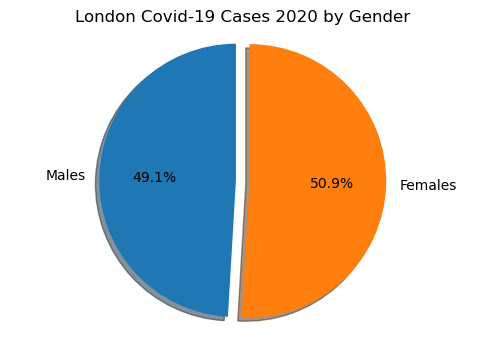

In [7]:
# create pie chart LDN

labels = 'Males', 'Females'
sizes = [MALETOTALDN,FEMALETOTALDN]
explode = (0, 0.1)  # explode one slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("London Covid-19 Cases 2020 by Gender")
plt.show()

In [8]:
# data manipulation to create pie chart
MALETOTAL = sum(ageNW_df['Males'])
print("North West")
print("Male cases: ",MALETOTAL)
FEMALETOTAL =sum(ageNW_df['Females'])
print("Female cases: ",FEMALETOTAL)

North West
Male cases:  78104
Female cases:  93008


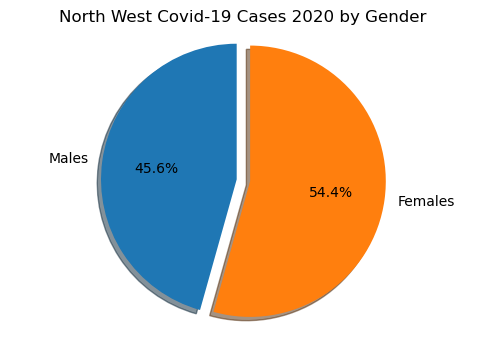

In [9]:
# create pie chart NW


labels = 'Males', 'Females'
sizes = [MALETOTAL,FEMALETOTAL]
explode = (0, 0.1)  # explode one slide

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("North West Covid-19 Cases 2020 by Gender")
plt.show()